In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-51k-records/Customer Segmentation.csv


## Expolaratory Data Analysis

### Importing Related Resources

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
import missingno as msno

Uploading and Reading Dataset 

In [4]:
file ='/kaggle/input/customer-segmentation-51k-records/Customer Segmentation.csv'
df = pd.read_csv(file)

Checking it properly load or not.

In [9]:
df.head()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,...,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,...,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,...,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,...,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,...,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57


In [10]:
df.tail()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
50995,Madeleine,Beales,Mrs,Female,mbealesrn@dagondesign.com,Point Hill,Jamaica,JM,18.090238,-77.109170,...,500,Trail,America/Jamaica,Flashpoint,Marketing,Pharmacist,Dhivehi,"University of the West Indies, Mona",Capital Equipment,194.87.138.177
50996,Tiena,Linfoot,Mrs,Female,tlinfootro@reddit.com,Jiesheng,China,CN,22.713664,115.458167,...,5983,Trail,Asia/Shanghai,Skajo,Services,Graphic Designer,Arabic,Hubei University,PE,218.8.15.234
50997,Warren,Skeggs,Mr,Male,wskeggsrp@who.int,El Copey,Colombia,CO,10.148976,-73.960233,...,47,Parkway,America/Bogota,Mybuzz,Accounting,VP Sales,Kyrgyz,Conservatorio del Tolima,BPWin,94.174.254.81
50998,Collette,Aspy,Dr,Polygender,caspyrq@weather.com,Xiaping,China,CN,27.568278,117.562238,...,334,Parkway,Asia/Shanghai,Eire,Legal,Assistant Media Planner,Amharic,China Agriculture University East,Aquariums,239.103.209.178
50999,Joscelin,Veschi,Mrs,Female,jveschirr@sogou.com,Xinglong,China,CN,40.417358,117.500558,...,8,Pass,Asia/Harbin,Edgeclub,Marketing,Marketing Manager,Bulgarian,Jishou University,GL,192.86.28.139


Shape of dataset

In [12]:
df.shape

(51000, 23)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      51000 non-null  object 
 1   last_name       51000 non-null  object 
 2   title           51000 non-null  object 
 3   gender          51000 non-null  object 
 4   email           51000 non-null  object 
 5   city            51000 non-null  object 
 6   country         51000 non-null  object 
 7   country_code    50966 non-null  object 
 8   latitude        51000 non-null  float64
 9   longitude       51000 non-null  float64
 10  phone           51000 non-null  object 
 11  street_address  51000 non-null  object 
 12  street_name     51000 non-null  object 
 13  street_number   51000 non-null  int64  
 14  street_suffix   51000 non-null  object 
 15  time_zone       51000 non-null  object 
 16  company_name    51000 non-null  object 
 17  department      51000 non-null 

In [16]:
df.columns

Index(['first_name', 'last_name', 'title', 'gender', 'email', 'city',
       'country', 'country_code', 'latitude', 'longitude', 'phone',
       'street_address', 'street_name', 'street_number', 'street_suffix',
       'time_zone', 'company_name', 'department', 'job_title', 'language',
       'university', 'linkedin_skill', 'ip_address'],
      dtype='object')

In [45]:
data = df[['first_name', 'last_name','gender', 'email','city',
       'country','time_zone', 'company_name', 'department', 'job_title', 'language',
       'university', 'linkedin_skill']]

extracting useful features from existing dataframe

In [46]:
data.head()

,first_name,last_name,gender,email,city,country,time_zone,company_name,department,job_title,language,university,linkedin_skill
0,Priscella,Pollett,Agender,ppollett0@foxnews.com,Sesheke,Zambia,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle
1,Ana,Onge,Male,aonge1@fda.gov,Querecotillo,Peru,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry
2,Butch,Rawls,Male,brawls2@slideshare.net,Licupis,Peru,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN
3,Ambros,Fairrie,Male,afairrie3@reuters.com,Yonghe,China,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication
4,Gaylene,Titcomb,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL


In [47]:
data.isnull().sum()

first_name        0
last_name         0
gender            0
email             0
city              0
country           0
time_zone         0
company_name      0
department        0
job_title         0
language          0
university        0
linkedin_skill    0
dtype: int64

<AxesSubplot:>

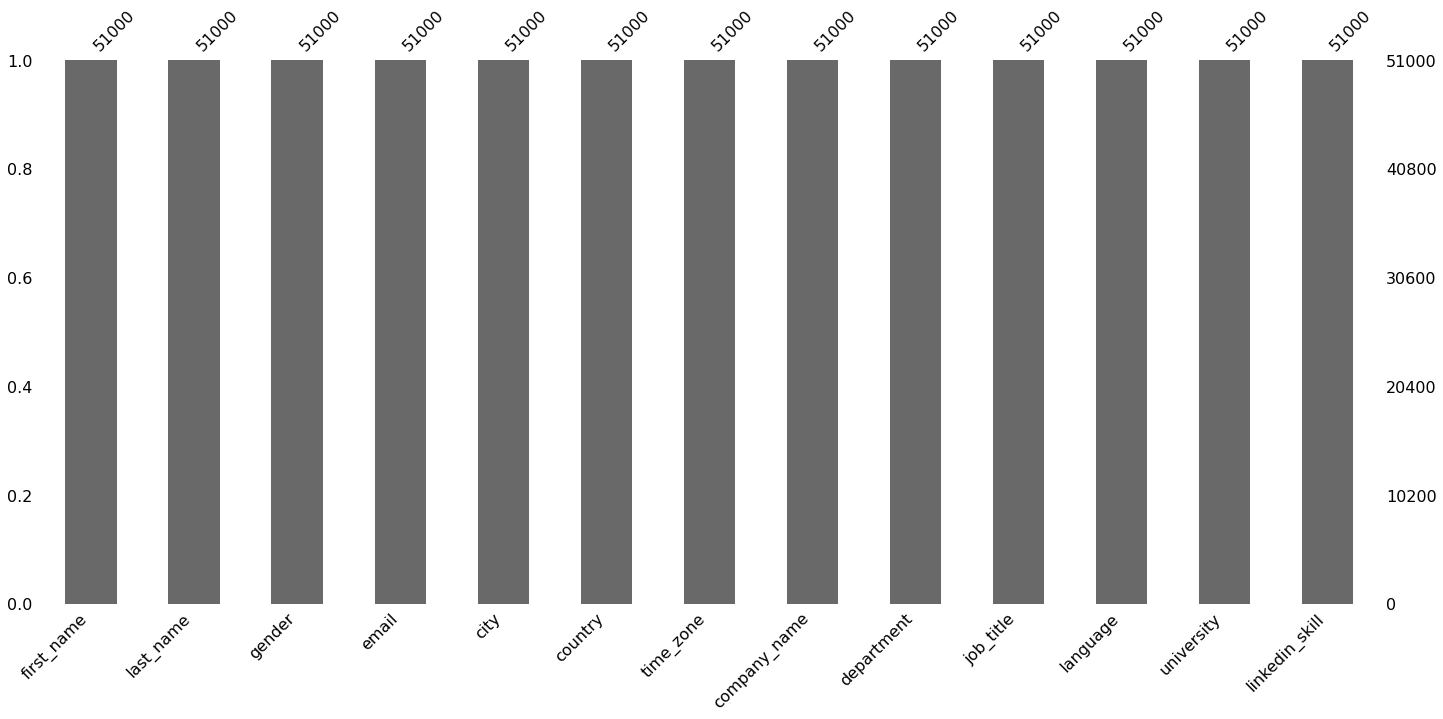

In [28]:
msno.bar(data)#checking missing value

Observation

-----------------------------------------


There is no missing value in dataset.

In [48]:
data.dtypes.value_counts()#checking various type of category in dataset.

object    13
dtype: int64

Observation

-----------------------------------------

1. There is no numarical type of data in our dataset.

In [49]:
data.info()# further inspecting each feature dtype correctly assign or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   first_name      51000 non-null  object
 1   last_name       51000 non-null  object
 2   gender          51000 non-null  object
 3   email           51000 non-null  object
 4   city            51000 non-null  object
 5   country         51000 non-null  object
 6   time_zone       51000 non-null  object
 7   company_name    51000 non-null  object
 8   department      51000 non-null  object
 9   job_title       51000 non-null  object
 10  language        51000 non-null  object
 11  university      51000 non-null  object
 12  linkedin_skill  51000 non-null  object
dtypes: object(13)
memory usage: 5.1+ MB


### Changing dtype

In [50]:
data = data.astype({"gender":'category',"department":'category',"job_title":'category',"language":'category',"linkedin_skill":'category'})

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   first_name      51000 non-null  object  
 1   last_name       51000 non-null  object  
 2   gender          51000 non-null  category
 3   email           51000 non-null  object  
 4   city            51000 non-null  object  
 5   country         51000 non-null  object  
 6   time_zone       51000 non-null  object  
 7   company_name    51000 non-null  object  
 8   department      51000 non-null  category
 9   job_title       51000 non-null  category
 10  language        51000 non-null  category
 11  university      51000 non-null  object  
 12  linkedin_skill  51000 non-null  category
 13  name            51000 non-null  object  
 14  continent       51000 non-null  object  
 15  timezone        51000 non-null  object  
dtypes: category(5), object(11)
memory usage: 4.8+ MB


### Making new features

In [58]:
data['name']=data['first_name'].str.cat(data['last_name'],sep=" ") # merging first and last name , no need of two seprate column for this.

In [56]:
s = data['time_zone'].str.split('/') # spliting time_zone into continent and time_zone.
data = data.assign(continent=s.str[0], timezone=s.str[1])

### Removing unnecessary column

In [63]:
data = data.drop(['first_name', 'last_name','time_zone', 'timezone'],axis=1)

### Renaming some column

In [66]:
data = data.rename(columns={'company_name': 'company', 'job_title': 'job','linkedin_skill':'skill'})

## Information about the schema

In [68]:
data.describe()

,gender,email,city,country,company,department,job,language,university,skill,name,continent
count,51000,51000,51000,51000,51000,51000,51000,51000,51000,51000,51000,51000
unique,8,51000,24921,235,383,12,195,97,6633,5976,50995,9
top,Male,ppollett0@foxnews.com,Stockholm,China,Youspan,Business Development,Analyst Programmer,Tetum,Pyongyang University of Science and Technology,Hand-drawn Typography,Walker Powdrill,Asia
freq,22918,1,100,9343,283,4327,502,597,99,20,2,24168


In [70]:
data.nunique()

gender            8
email         51000
city          24921
country         235
company         383
department       12
job             195
language         97
university     6633
skill          5976
name          50995
continent         9
dtype: int64

### Inspecting each varriable

Text(0, 0.5, 'department')

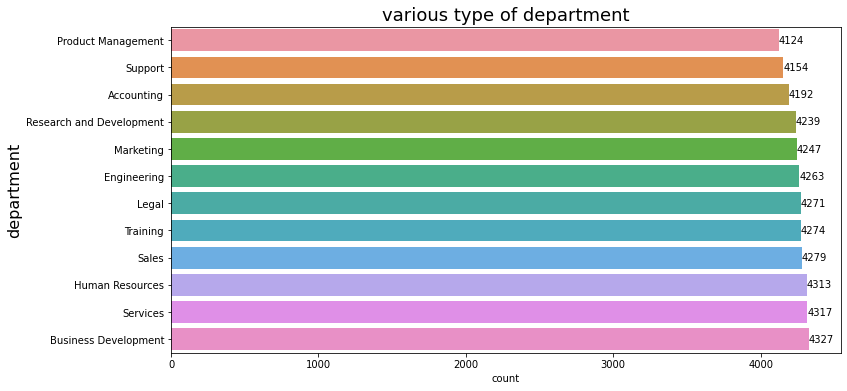

In [81]:
plt.figure(figsize=(12, 6))
department = data['department']
ax=sns.countplot(y= department ,data =data,orient='h',order=department.value_counts().sort_values().index)
plt.title('various type of department', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('department', fontsize=16)


Observation

-----------------------------------------------------------

1. Proportion of every department is somewhat simmilar in dataset.

Text(0, 0.5, 'Gender')

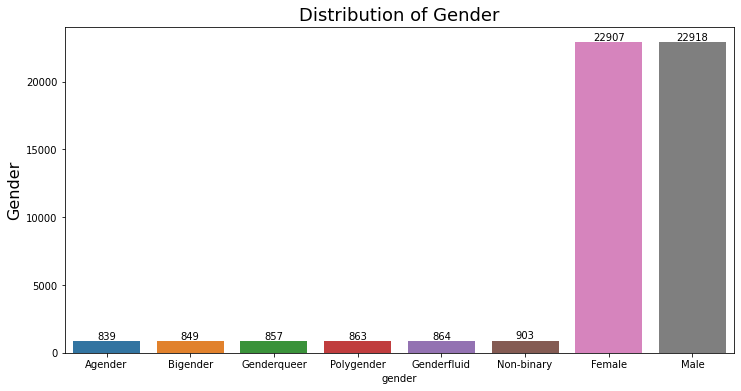

In [79]:
plt.figure(figsize=(12, 6))
sex = data['gender']
ax=sns.countplot(x= sex ,data =data,orient='v',order=sex.value_counts().sort_values().index)
plt.title('Distribution of Gender', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('Gender', fontsize=16)

Observation

-----------------------------------------------------------

1. Male and Female gender is more in number.
2. proprtion of male and female is appreox same.
3. Show diversity in our dataset.

Text(0, 0.5, 'continent')

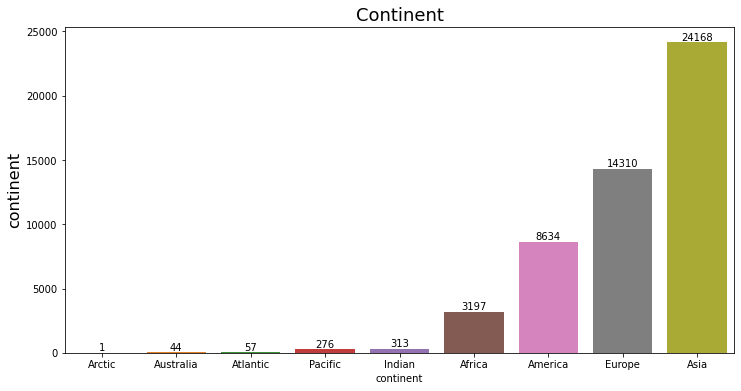

In [83]:
plt.figure(figsize=(12, 6))
continent = data['continent']
ax=sns.countplot(x= continent ,data =data,orient='v',order=continent.value_counts().sort_values().index)
plt.title('Continent', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=16)
plt.ylabel('continent', fontsize=16)

Observation
-------------------------------------------------

1. Asia is dominating.
2. India as sub_continent. 

In [84]:
import squarify # pip install squarify

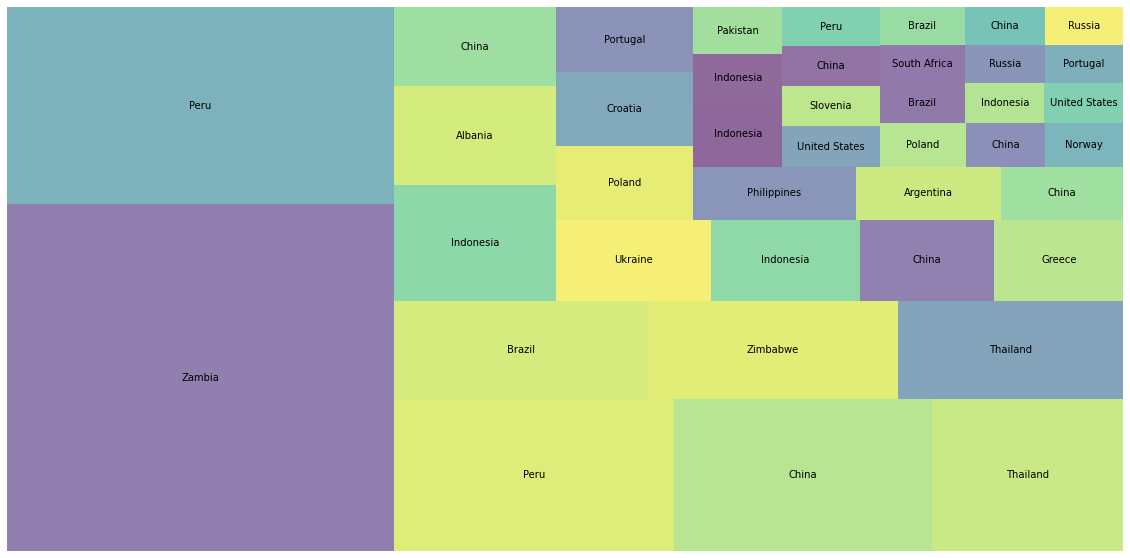

In [99]:
plt.figure(figsize=(20, 10))
sizes = data['country'].value_counts()[:40]
squarify.plot(sizes=sizes, label=data['country'], alpha=0.6)
plt.axis('off')
plt.show()
